<a href="https://colab.research.google.com/github/aimiliavaitsi/Reddit-PubMed-Scrapping-and-Sentiment-Analysis/blob/main/VADER_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install necessary libraries
!pip install pandas openpyxl nltk vaderSentiment

import pandas as pd
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from google.colab import files

nltk.download('vader_lexicon')

# Step 2: Upload File
uploaded = files.upload()

# Step 3: Read the data from different tabs
file_name = next(iter(uploaded))

reddit_data = pd.read_excel(file_name, sheet_name='Reddit data')
pubmed_data = pd.read_excel(file_name, sheet_name='PubMed data')

# Print column names to verify
print("Reddit data columns:", reddit_data.columns)
print("PubMed data columns:", pubmed_data.columns)

reddit_comment_column = 'Comment'
reddit_year_column = 'Year'

pubmed_abstract_column = 'Abstract'
pubmed_year_column = 'Year'

# Step 4: Sentiment Analysis using VADER
analyzer = SentimentIntensityAnalyzer()

reddit_data['Sentiment'] = reddit_data[reddit_comment_column].apply(lambda x: analyzer.polarity_scores(x)['compound'] if pd.notnull(x) else 0)
pubmed_data['Sentiment'] = pubmed_data[pubmed_abstract_column].apply(lambda x: analyzer.polarity_scores(x)['compound'] if pd.notnull(x) else 0)

# Step 5: Calculate Sentiment Scores per Year
reddit_yearly_sentiment = reddit_data.groupby(reddit_year_column)['Sentiment'].mean().reindex(range(2010, 2025)).fillna(0)
pubmed_yearly_sentiment = pubmed_data.groupby(pubmed_year_column)['Sentiment'].mean().reindex(range(2010, 2025)).fillna(0)

# Combine results into a single DataFrame
combined_sentiment = pd.DataFrame({
    'Year': range(2010, 2025),
    'Reddit_Sentiment': reddit_yearly_sentiment.values,
    'PubMed_Sentiment': pubmed_yearly_sentiment.values
})

# Step 6: Download the result
combined_sentiment.to_csv('sentiment_scores.csv', index=False)
files.download('sentiment_scores.csv')

# Display sentiment scores per year
combined_sentiment


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Saving Sentiment Analysis Final.xlsx to Sentiment Analysis Final (2).xlsx
Reddit data columns: Index(['Post Title', 'Comment', 'Year'], dtype='object')
PubMed data columns: Index(['Title', 'Abstract', 'Year'], dtype='object')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Year,Reddit_Sentiment,PubMed_Sentiment
0,2010,0.204756,0.364901
1,2011,0.210983,0.421680
2,2012,0.407681,0.399490
3,2013,0.387742,0.454374
4,2014,0.074914,0.379740
5,2015,0.117464,0.441463
6,2016,0.140941,0.447297
7,2017,0.276003,0.429709
8,2018,0.169152,0.461683
9,2019,0.134687,0.470773


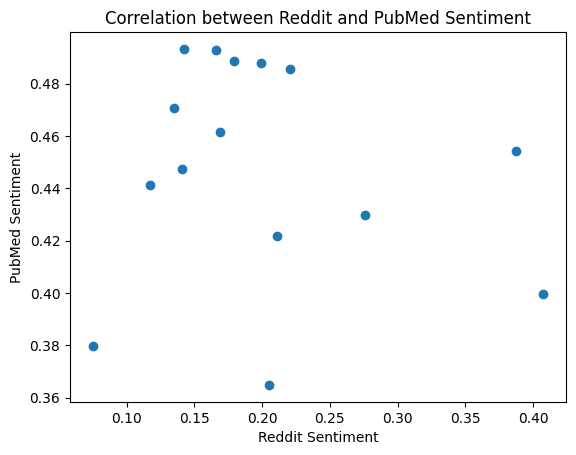

In [ ]:
# @title Correlation between Reddit and PubMed Sentiment

import matplotlib.pyplot as plt

plt.scatter(combined_sentiment['Reddit_Sentiment'], combined_sentiment['PubMed_Sentiment'])

plt.xlabel('Reddit Sentiment')
plt.ylabel('PubMed Sentiment')
_ = plt.title('Correlation between Reddit and PubMed Sentiment')


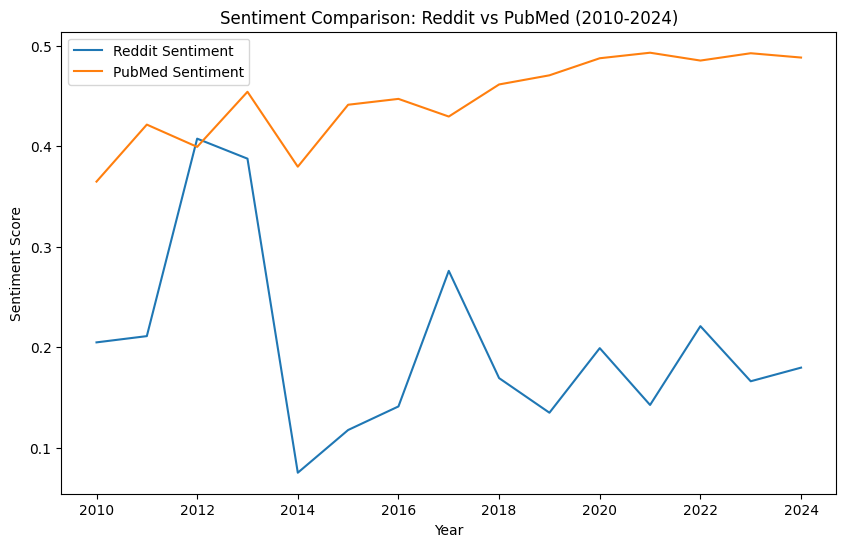

In [ ]:
# @title Sentiment Comparison: Reddit vs PubMed (2010-2024)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(combined_sentiment['Year'], combined_sentiment['Reddit_Sentiment'], label='Reddit Sentiment')
plt.plot(combined_sentiment['Year'], combined_sentiment['PubMed_Sentiment'], label='PubMed Sentiment')
plt.xlabel('Year')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Comparison: Reddit vs PubMed (2010-2024)')
_ = plt.legend()


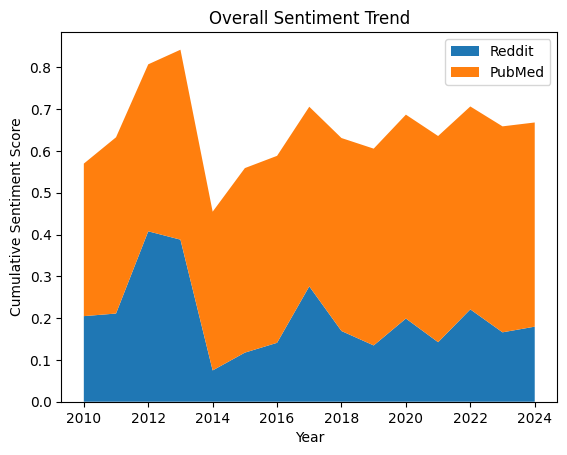

In [ ]:
# @title Overall Sentiment Trend

import matplotlib.pyplot as plt

plt.stackplot(combined_sentiment['Year'], combined_sentiment['Reddit_Sentiment'], combined_sentiment['PubMed_Sentiment'], labels=['Reddit', 'PubMed'])

plt.xlabel('Year')
plt.ylabel('Cumulative Sentiment Score')
plt.title('Overall Sentiment Trend')
_ = plt.legend()
